# Supply Chain Freight Cost Analysis

## Project Overview
This Jupyter notebook analyzes the freight costs within the global supply chain management system using the SCMS dataset. The focus is on uncovering key factors that impact freight costs and predicting these costs using machine learning models.

## Dataset Description
The dataset includes shipping details such as shipment mode, freight cost, item value, and other related features from global supply chain operations.


In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Data Loading and Cleaning

Here, we load the dataset and perform initial preprocessing to clean the data, which includes filling missing values and correcting data formats.


In [29]:
# Load the data
data = pd.read_csv('SCMS_Delivery_History_Dataset_20150929.csv', encoding='ISO-8859-1')

# Data cleaning
# Safely fill missing values without using inplace in a chained assignment
data['Shipment Mode'] = data['Shipment Mode'].fillna(data['Shipment Mode'].mode()[0])
data['Freight Cost (USD)'] = pd.to_numeric(data['Freight Cost (USD)'], errors='coerce')
data['Freight Cost (USD)'] = data['Freight Cost (USD)'].fillna(data['Freight Cost (USD)'].median())


## Descriptive Statistics

The following tables and figures provide a statistical summary of the numerical and categorical features within the dataset. This helps in understanding the distribution, count, and presence of outliers in the data.


In [30]:
# Displaying descriptive statistics
display(data.describe())


,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Freight Cost (USD),Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,9011.627852,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,12517.228517,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.750000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,4323.807500,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,5869.655000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,7707.640000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,289653.200000,7708.440000


## Data Visualization

Visualizations to explore the relationships between different features and the target variable (Freight Cost). These plots help in understanding the distributions and potential correlations.


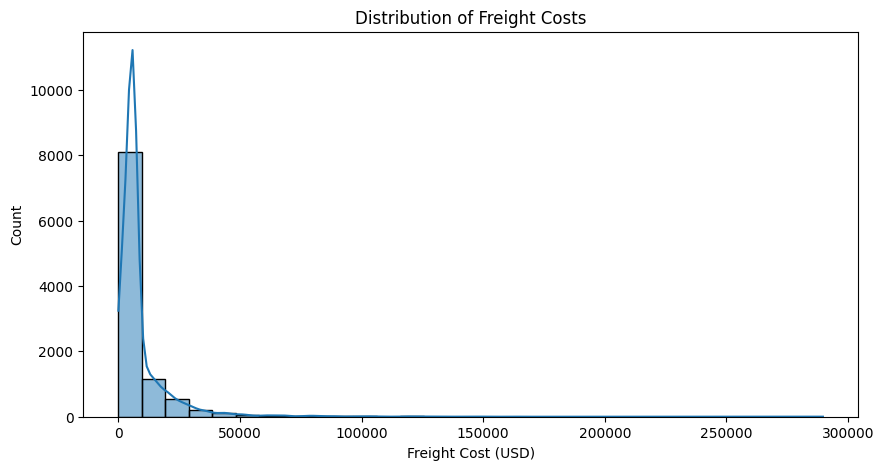

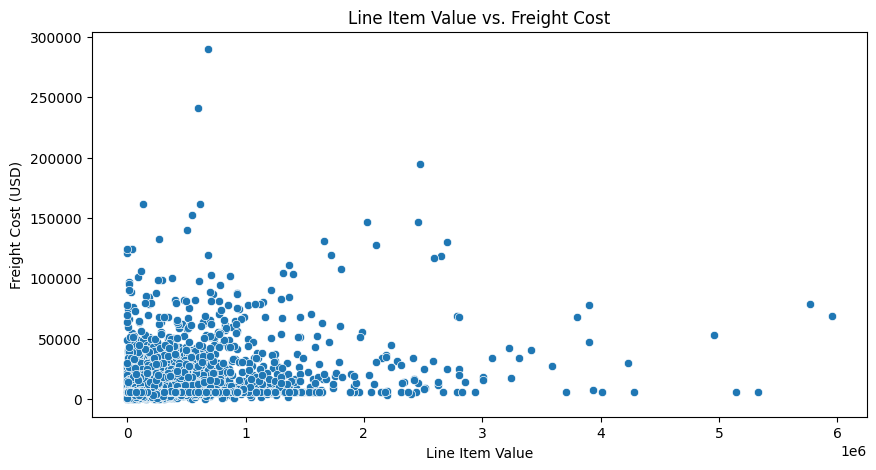

In [31]:
# Histogram of Freight Cost
plt.figure(figsize=(10, 5))
sns.histplot(data['Freight Cost (USD)'], bins=30, kde=True)
plt.title('Distribution of Freight Costs')
plt.show()

# Scatter plot of Line Item Value vs. Freight Cost
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Line Item Value', y='Freight Cost (USD)', data=data)
plt.title('Line Item Value vs. Freight Cost')
plt.show()


## Predictive Modeling

Building a model to predict the freight costs based on features like 'Line Item Value' and 'Weight (Kilograms)'. We use a linear regression model as a starting point.


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.read_csv('SCMS_Delivery_History_Dataset_20150929.csv', encoding='ISO-8859-1')

# Handle missing values without using inplace=True
data['Shipment Mode'] = data['Shipment Mode'].fillna(data['Shipment Mode'].mode()[0])
data['Freight Cost (USD)'] = pd.to_numeric(data['Freight Cost (USD)'], errors='coerce')
data['Freight Cost (USD)'] = data['Freight Cost (USD)'].fillna(data['Freight Cost (USD)'].median())

data['Weight (Kilograms)'] = pd.to_numeric(data['Weight (Kilograms)'], errors='coerce')
data['Weight (Kilograms)'] = data['Weight (Kilograms)'].fillna(data['Weight (Kilograms)'].median())

# Ensure there are no missing values in the features
X = data[['Line Item Value', 'Weight (Kilograms)']].fillna(0)
y = data['Freight Cost (USD)'].fillna(0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Model prediction
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 128970374.9052254
R^2 Score: 0.19041257523873512


## Conclusion and Future Work

In this notebook, we explored various factors that impact freight costs in supply chain operations. The initial model provides a baseline for future improvements. Going forward, additional features can be engineered, and more complex models like Random Forest or Gradient Boosting could be employed to improve prediction accuracy.  Thank you for taking a look at my Supply Chain Data Analysis Project!

